In [1]:
import subprocess
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import svgd
import random
%matplotlib inline

class BFNN(torch.nn.Module):
    def __init__(self, d, L, n, V):
        super().__init__()
        self.d = d
        self.L = L
        self.n = n
        self.V = V
        self.theta = torch.nn.Parameter(torch.randn(self.n, self.L))

        # define layers
        #self.num_nodes = num_nodes
        #self.layers = []
        #for i in range(len(num_nodes)):
        #  if i == 0:
        #    self.layers.append(torch.nn.Linear(self.d, num_nodes[0]))
        #  else:
        #    self.layers.append(torch.nn.Linear(num_nodes[i-1], num_nodes[i]))
        #self.layers.append(torch.nn.Linear(num_nodes[-1], L))
        self.layer1 = torch.nn.Linear(d, 128)
        self.layer2 = torch.nn.Linear(128, 128)
        self.layer3 = torch.nn.Linear(128, 128)
        self.layer4 = torch.nn.Linear(128, 128)
        self.layerL = torch.nn.Linear(128, L)

        # define activation functions
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        #for i in range(len(self.num_nodes)):
        #  X = self.layers[i](X)
        #  X = self.relu(X)
        #self.Psi = self.layers[-1](X)

        X = self.layer1(X)
        X = self.relu(X)
        X = self.layer2(X)
        X = self.relu(X)
        X = self.layer3(X)
        X = self.relu(X)
        X = self.layer4(X)
        X = self.relu(X)
        self.Psi = self.layerL(X)
        self.yhat = self.theta @ self.Psi.t() 
        return self.yhat
    

class Dataset(torch.utils.data.Dataset):
    def __init__(self, predictors, labels):
        self.labels = labels
        self.predictors = predictors

    def __len__(self):
        return self.labels.shape[0]

    def __getitem__(self, index):
        X = self.predictors[index, :]
        y = self.labels[index, :]

        return X, y
    

import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.linear = nn.Linear(32 * 7 * 7, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        x = self.linear(x)
        x = self.sigmoid(x)
        return x
    

import torch.nn as nn

class CNN_FB(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(1, 64, 3, 1, "same"),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size = 2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(64, 32, 3, 1, "same"),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(32, 32, 3, 1, "same"),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.conv4 = nn.Sequential(         
            nn.Conv2d(32, 32, 3, 1, "same"),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.linear1 = nn.Linear(224, 64)
        self.linear2 = nn.Linear(64, 784)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
                                 
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)      
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x

In [2]:
train_data = np.loadtxt("fashion-mnist_train.csv", skiprows = 1, delimiter = ",")
test_data = np.loadtxt("fashion-mnist_test.csv", skiprows = 1, delimiter = ",")

In [4]:
train_img = train_data[:, 1:]
test_img = test_data[:, 1:]
train_label = train_data[:, 0]
test_label = test_data[:, 0]
train_img = train_img / 255
test_img = test_img / 255

In [5]:
#label = 7
#train_idx_all = np.where(train_label == label)[0]
#test_idx_all = np.where(test_label == label)[0]
train_idx_all = np.arange(60000)
test_idx_all = np.arange(10000)

Loading required package: lattice
Loading required package: Rcpp
Loading required package: RcppArmadillo
Loading required package: glmnet
Loading required package: Matrix
Loaded glmnet 4.1-3
Loading required package: horseshoe
Loading required package: pgdraw


epoch: 1 / 30, training rmse: 1.1614, training r2: 0.1229
epoch: 2 / 30, training rmse: 1.0802, training r2: 0.2413
epoch: 3 / 30, training rmse: 0.9921, training r2: 0.3601
epoch: 4 / 30, training rmse: 0.8912, training r2: 0.4836
epoch: 5 / 30, training rmse: 0.7796, training r2: 0.6048
epoch: 6 / 30, training rmse: 0.6713, training r2: 0.707
epoch: 7 / 30, training rmse: 0.5759, training r2: 0.7843
epoch: 8 / 30, training rmse: 0.5046, training r2: 0.8344
epoch: 9 / 30, training rmse: 0.4515, training r2: 0.8675
epoch: 10 / 30, training rmse: 0.4149, training r2: 0.8881
epoch: 11 / 30, training rmse: 0.3881, training r2: 0.902
epoch: 12 / 30, training rmse: 0.3694, training r2: 0.9113
epoch: 13 / 30, training rmse: 0.3549, training r2: 0.9181
epoch: 14 / 30, training rmse: 0.3452, training r2: 0.9225
epoch: 15 / 30, training rmse: 0.3379, training r2: 0.9258
epoch: 16 / 30, training rmse: 0.332, training r2: 0.9283
epoch: 17 / 30, training rmse: 0.3281, training r2: 0.93
epoch: 18 /

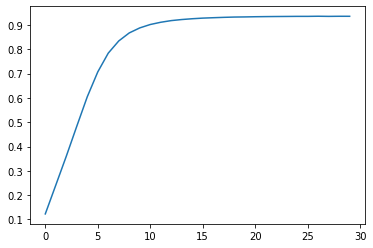

0 [0. 0. 0. 0.] [0.02515139 0.02831879 0.03531513 0.03662549]


In [6]:
n = 2000
n_train = 1000
n_test = 1000

num_exp = 50
result_mse = np.zeros((num_exp, 4))
result_acc = np.zeros((num_exp, 4))
L = 100
for exp in range(1):
    random.seed(exp)
    torch.manual_seed(exp)
    np.random.seed(exp)
    #####################################################################
    # generate images
    train_idx = np.random.choice(train_idx_all, size = n_train, replace = False)
    test_idx = np.random.choice(test_idx_all, size = n_test, replace = False)

    train_imgs = train_img[train_idx, ]
    test_imgs = test_img[test_idx, ]
    train_lbs = train_label[train_idx]
    test_lbs = test_label[test_idx]

    train_quantiles = np.zeros((4, n_train))
    for i in range(n_train):
        train_img_i = train_imgs[i, :]
        train_img_i = train_img_i[train_img_i > 0]
        train_quantiles[:, i] = np.quantile(train_img_i, [0, 0.25, 0.5, 0.75])


    train_q0 = np.tile(train_quantiles[0, :].reshape((n_train, 1)), (1, 784))
    train_q1 = np.tile(train_quantiles[1, :].reshape((n_train, 1)), (1, 784))
    train_q2 = np.tile(train_quantiles[2, :].reshape((n_train, 1)), (1, 784))
    train_q3 = np.tile(train_quantiles[3, :].reshape((n_train, 1)), (1, 784))

    train_p0 = np.zeros((n_train, 784))
    train_p1 = np.zeros((n_train, 784))
    train_p2 = np.zeros((n_train, 784))
    train_p3 = np.zeros((n_train, 784))

    train_p3[train_imgs >= train_q3] = train_imgs[train_imgs >= train_q3]
    train_p2[(train_imgs >= train_q2) & (train_imgs < train_q3)] = train_imgs[(train_imgs >= train_q2) & (train_imgs < train_q3)]
    train_p1[(train_imgs >= train_q1) & (train_imgs < train_q2)] = train_imgs[(train_imgs >= train_q1) & (train_imgs < train_q2)]
    train_p0[(train_imgs >= train_q0) & (train_imgs < train_q1)] = train_imgs[(train_imgs >= train_q0) & (train_imgs < train_q1)]

    train_predictors = np.zeros((n_train, 28*28*4))
    train_outcomes = train_imgs
    for i in range(n_train):
        train_p0_i = train_p0[i, :].reshape((28, 28))
        train_p1_i = train_p1[i, :].reshape((28, 28))
        train_p2_i = train_p2[i, :].reshape((28, 28))
        train_p3_i = train_p3[i, :].reshape((28, 28))
        train_predictor_i = np.hstack((train_p0_i, train_p1_i, train_p2_i, train_p3_i))
        train_predictors[i, :] = train_predictor_i.reshape(-1)

    test_quantiles = np.zeros((4, n_test))
    for i in range(n_test):
        test_img_i = test_imgs[i, :]
        test_img_i = test_img_i[test_img_i > 0]
        test_quantiles[:, i] = np.quantile(test_img_i, [0, 0.25, 0.5, 0.75])


    test_q0 = np.tile(test_quantiles[0, :].reshape((n_test, 1)), (1, 784))
    test_q1 = np.tile(test_quantiles[1, :].reshape((n_test, 1)), (1, 784))
    test_q2 = np.tile(test_quantiles[2, :].reshape((n_test, 1)), (1, 784))
    test_q3 = np.tile(test_quantiles[3, :].reshape((n_test, 1)), (1, 784))

    test_p0 = np.zeros((n_test, 784))
    test_p1 = np.zeros((n_test, 784))
    test_p2 = np.zeros((n_test, 784))
    test_p3 = np.zeros((n_test, 784))

    test_p3[test_imgs >= test_q3] = test_imgs[test_imgs >= test_q3]
    test_p2[(test_imgs >= test_q2) & (test_imgs < test_q3)] = test_imgs[(test_imgs >= test_q2) & (test_imgs < test_q3)]
    test_p1[(test_imgs >= test_q1) & (test_imgs < test_q2)] = test_imgs[(test_imgs >= test_q1) & (test_imgs < test_q2)]
    test_p0[(test_imgs >= test_q0) & (test_imgs < test_q1)] = test_imgs[(test_imgs >= test_q0) & (test_imgs < test_q1)]

    test_predictors = np.zeros((n_test, 28*28*4))
    test_outcomes = test_imgs
    for i in range(n_test):
        test_p0_i = test_p0[i, :].reshape((28, 28))
        test_p1_i = test_p1[i, :].reshape((28, 28))
        test_p2_i = test_p2[i, :].reshape((28, 28))
        test_p3_i = test_p3[i, :].reshape((28, 28))
        test_predictor_i = np.hstack((test_p0_i, test_p1_i, test_p2_i, test_p3_i))
        test_predictors[i, :] = test_predictor_i.reshape(-1)

    np.savetxt("train_predictors.txt", train_predictors)
    np.savetxt("test_predictors.txt", test_predictors)
    np.savetxt("train_outcomes.txt", train_outcomes)
    np.savetxt("test_outcomes.txt", test_outcomes)
    
    # fit basis for predictors
    grid_x = np.tile(np.arange(112), 28)
    grid_y = np.repeat(np.arange(28), 112)
    grid_x = (grid_x - 111 / 2) / (111 / 2)
    grid_y = (grid_y - 27 / 2) / (27 / 2)
    grids = np.vstack((grid_x, grid_y))
    np.savetxt("x.txt", grids)

    X = grids.T
    X = torch.tensor(X, dtype = torch.float32)
    y = train_predictors
    y = torch.tensor(y, dtype = torch.float32)

    model = BFNN(d = 2, L = L, n = n_train, V = 28*28*4)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
    mse_criterion = torch.nn.MSELoss()
    for epoch in range(10000):
        yhat = model.forward(X)
        loss = mse_criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    np.savetxt("Psi_predictors.txt", model.Psi.detach().numpy(), delimiter = ",")
    
    #####################################################################
    # fit basis for outcomes
    grid_x = np.tile(np.arange(28), 28)
    grid_y = np.repeat(np.arange(28), 28)
    grid_x = (grid_x - 27 / 2) / (27 / 2)
    grid_y = (grid_y - 27 / 2) / (27 / 2)
    grids = np.vstack((grid_x, grid_y))

    X = grids.T
    X = torch.tensor(X, dtype = torch.float32)
    y = train_outcomes
    y = torch.tensor(y, dtype = torch.float32)
    model = BFNN(d = 2, L = L, n = n_train, V = 28*28)
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)
    mse_criterion = torch.nn.MSELoss()
    for epoch in range(10000):
        optimizer.zero_grad()
        yhat = model.forward(X)
        loss = mse_criterion(yhat, y)
        loss.backward()
        optimizer.step()

    np.savetxt("Psi_outcomes.txt", model.Psi.detach().numpy(), delimiter = ",")
    
    #####################################################################
    # orthogolize basis and find basis coefficients
    subprocess.call(["/sw/arcts/centos7/stacks/gcc/8.2.0/R/4.0.3/bin/Rscript", "part2.R", "{}".format(L)], stdout=subprocess.DEVNULL)
    
    #####################################################################
    # load coefficients and orthogonalized basis
    theta_train_predictors = np.loadtxt("theta_train_predictors.txt")
    theta_test_predictors = np.loadtxt("theta_test_predictors.txt")
    theta_train_outcomes = np.loadtxt("theta_train_outcomes.txt")
    theta_test_outcomes = np.loadtxt("theta_test_outcomes.txt")
    Psi_p = np.loadtxt("Psi_p.txt")
    Psi_o = np.loadtxt("Psi_o.txt")
    
    #####################################################################
    # model relationship of coefficients
    svgd_nn = svgd.svgd_bnn(X_train = theta_train_predictors, 
                        y_train = theta_train_outcomes,
                        a_gamma = 1, 
                        b_gamma = 1, 
                        a_lambda = 1, 
                        b_lambda = 1e2, 
                        batch_size = 64, 
                        epochs = 30)
    svgd_nn.train()
    
    #####################################################################
    # check prediction accuracy
    theta_train_pred, _, _ = svgd_nn.predict(theta_train_predictors, 0.9)
    theta_test_pred, _, _ = svgd_nn.predict(theta_test_predictors, 0.9)
    train_pred = theta_train_pred @ Psi_o.T
    test_pred = theta_test_pred @ Psi_o.T
    train_pred = torch.tensor(train_pred, dtype = torch.float32).reshape((n_train, 1, 28, 28))
    test_pred = torch.tensor(test_pred, dtype = torch.float32).reshape((n_test, 1, 28, 28))

    #result_acc[exp, 0] = sum( (cnn(train_pred).detach().numpy().reshape(-1) > 0.5) == (train_outcomes_label == 1) ) / n_train
    #result_acc[exp, 1] = sum( (cnn(test_pred).detach().numpy().reshape(-1) > 0.5) == (test_outcomes_label == 1) ) / n_test

    result_mse[exp, 0] = np.mean((train_pred.detach().numpy().reshape((n_train, 784)) - train_outcomes)**2)
    result_mse[exp, 1] = np.mean((test_pred.detach().numpy().reshape((n_test, 784)) - test_outcomes)**2)
    #####################################################################
    # use cnn pipeline to predict outcomes from predictors directly
    cnn_fb = CNN_FB()
    cnn_train_predictors = torch.tensor(train_predictors, dtype = torch.float32).reshape((n_train, 1, 28, 112))
    cnn_train_outcomes = torch.tensor(train_outcomes, dtype = torch.float32).reshape((n_train, 784))
    cnn_fb_loss = nn.functional.mse_loss
    cnn_fb_optim = torch.optim.Adam(cnn_fb.parameters(), lr = 1e-3)

    cnn_fb_dataset = Dataset(cnn_train_predictors, cnn_train_outcomes)
    cnn_fb_dataloader = torch.utils.data.DataLoader(cnn_fb_dataset, batch_size = 64, shuffle = True)

    num_epochs = 50
    cnn_fb.train()
    for epoch in range(num_epochs):
        for (idx, (X_batch, y_batch)) in enumerate(cnn_fb_dataloader):
            output = cnn_fb(X_batch)             
            loss = cnn_fb_loss(output, y_batch)

            cnn_fb_optim .zero_grad()           
            loss.backward()            
            cnn_fb_optim .step()                

    cnn_train_pred = cnn_fb(cnn_train_predictors).reshape((n_train, 1, 28, 28))
    cnn_test_pred = cnn_fb(torch.tensor(test_predictors, dtype = torch.float32).reshape((n_test, 1, 28, 112))).reshape((n_test, 1, 28, 28))

    #result_acc[exp, 2] = sum( (cnn(cnn_train_pred).detach().numpy().reshape(-1) > 0.5) == (train_outcomes_label == 1) ) / n_train
    #result_acc[exp, 3] = sum( (cnn(cnn_test_pred).detach().numpy().reshape(-1) > 0.5) == (test_outcomes_label == 1) ) / n_test

    result_mse[exp, 2] = np.mean((cnn_train_pred.detach().numpy().reshape((n_train, 784)) - train_outcomes)**2)
    result_mse[exp, 3] = np.mean((cnn_test_pred.detach().numpy().reshape((n_test, 784)) - test_outcomes)**2)
    print(exp, result_acc[exp, :], result_mse[exp, :])

#np.savetxt("result_mse.txt", result_mse)
#np.savetxt("result_acc.txt", result_acc)

### check MSE for each class of images

In [7]:
name_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
             "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
mse_by_class = np.zeros((10, 2))
for lb in range(10):
    mse_by_class[lb, 0] = sum(train_lbs == lb)
    mse_by_class[lb, 1] = np.mean((train_pred.detach().numpy().reshape((n_train, 784))[train_lbs == lb, :] - train_outcomes[train_lbs == lb, :])**2)

In [8]:
mse_by_class[:, 0]

array([ 89., 108., 110., 110.,  96., 105.,  92.,  81., 105., 104.])

In [9]:
mse_by_class[:, 1]

array([0.02184454, 0.01963511, 0.02002398, 0.02438258, 0.02331437,
       0.03218134, 0.02139003, 0.02216755, 0.03388098, 0.03138208])

In [10]:
for lb in range(10):
    mse_by_class[lb, 0] = sum(test_lbs == lb)
    mse_by_class[lb, 1] = np.mean((test_pred.detach().numpy().reshape((n_train, 784))[test_lbs == lb, :] - test_outcomes[test_lbs == lb, :])**2)

In [11]:
mse_by_class[:, 0]

array([ 88., 101., 108., 103., 106., 105., 104., 104., 101.,  80.])

In [12]:
mse_by_class[:, 1]

array([0.02484377, 0.02255228, 0.02515978, 0.02781031, 0.02771048,
       0.03447405, 0.02301474, 0.02216414, 0.04201966, 0.03466709])

### plot in manuscript

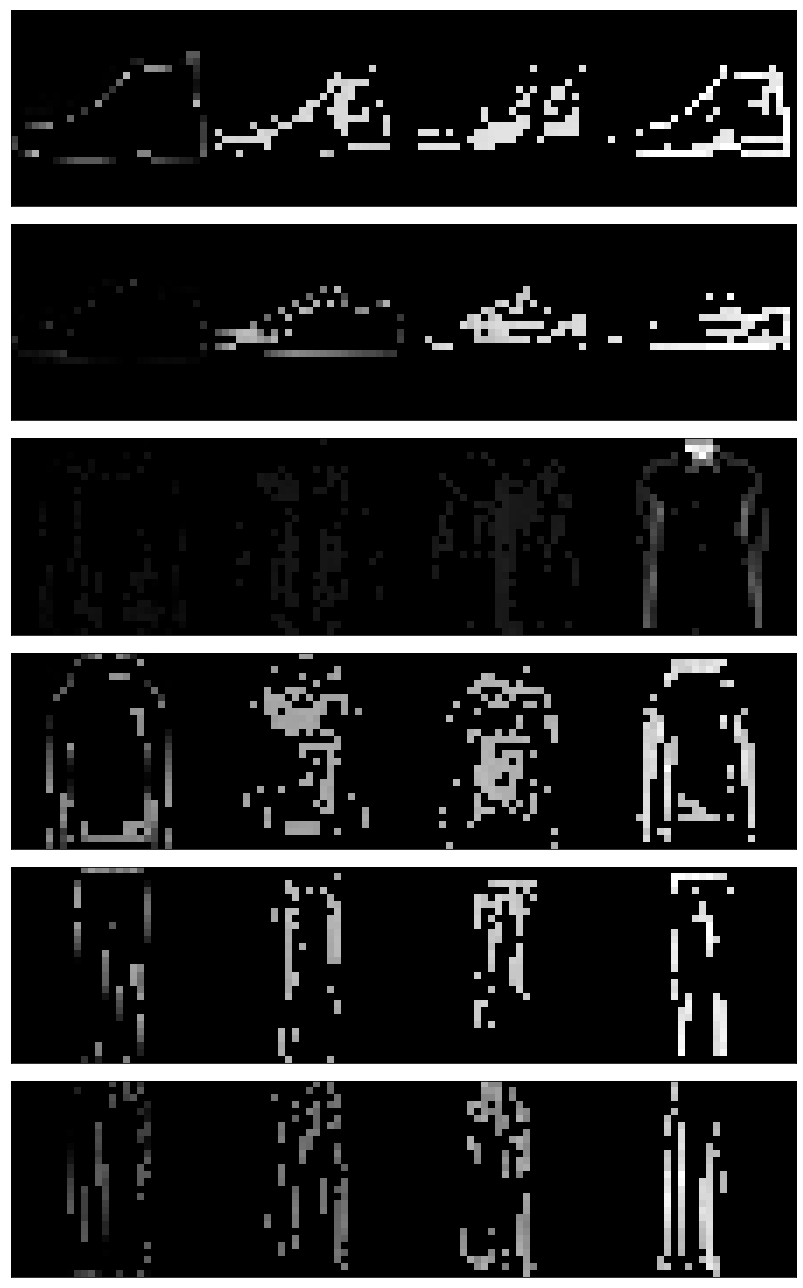

In [161]:
i1, i2, i3, i4, i5, i6 = 14, 30, 35, 37, 0, 132
fg, ax = plt.subplots(6, 1, figsize = (12, 18))
ax[0].matshow(test_predictors[i1, :].reshape((28, 112)), cmap = "gray")
ax[1].matshow(test_predictors[i2, :].reshape((28, 112)), cmap = "gray")
ax[2].matshow(test_predictors[i3, :].reshape((28, 112)), cmap = "gray")
ax[3].matshow(test_predictors[i4, :].reshape((28, 112)), cmap = "gray")
ax[4].matshow(test_predictors[i5, :].reshape((28, 112)), cmap = "gray")
ax[5].matshow(test_predictors[i6, :].reshape((28, 112)), cmap = "gray")

for i in range(6):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.savefig("fmnist_p.png")
plt.show()

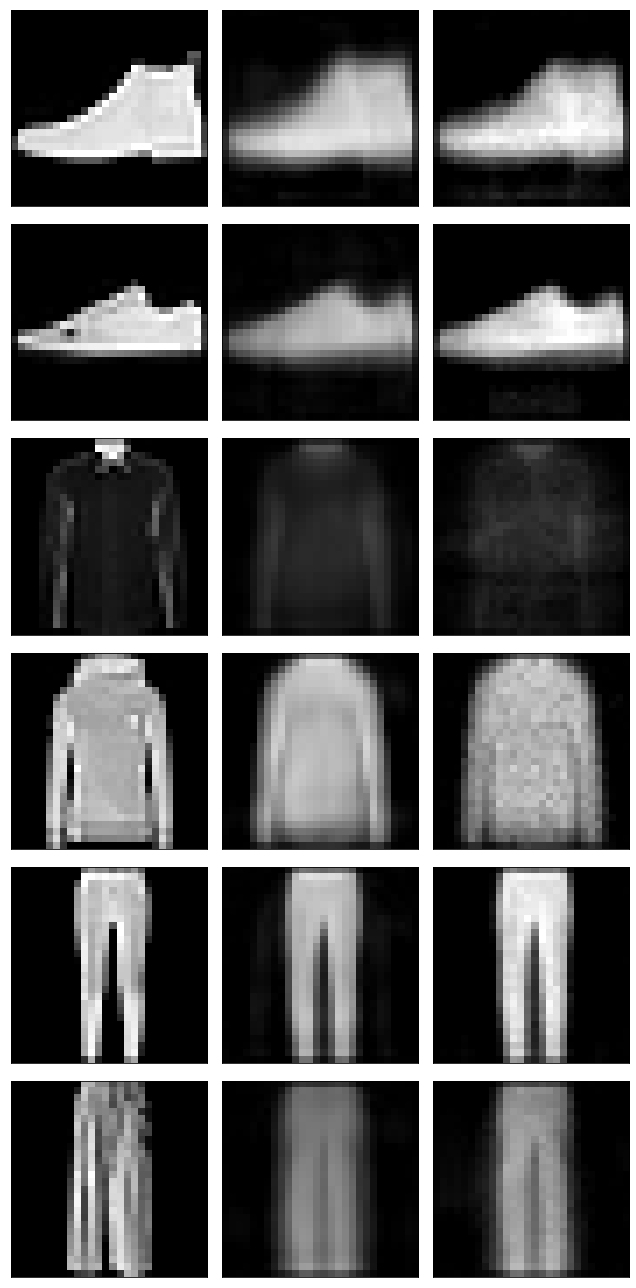

In [160]:
i1, i2, i3, i4, i5, i6 = 14, 30, 35, 37, 0, 132
fg, ax = plt.subplots(6, 3, figsize = (9, 18))
ax[0, 0].matshow(test_outcomes[i1, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[0, 1].matshow(test_pred[i1, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[0, 2].matshow(cnn_test_pred[i1, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

ax[1, 0].matshow(test_outcomes[i2, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[1, 1].matshow(test_pred[i2, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[1, 2].matshow(cnn_test_pred[i2, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

ax[2, 0].matshow(test_outcomes[i3, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[2, 1].matshow(test_pred[i3, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[2, 2].matshow(cnn_test_pred[i3, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

ax[3, 0].matshow(test_outcomes[i4, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[3, 1].matshow(test_pred[i4, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[3, 2].matshow(cnn_test_pred[i4, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

ax[4, 0].matshow(test_outcomes[i5, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[4, 1].matshow(test_pred[i5, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[4, 2].matshow(cnn_test_pred[i5, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

ax[5, 0].matshow(test_outcomes[i6, :].reshape(28, 28), cmap = "gray", vmin = 0, vmax = 1)
ax[5, 1].matshow(test_pred[i6, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)
ax[5, 2].matshow(cnn_test_pred[i6, :].detach().numpy().reshape((28, 28)), cmap = "gray", vmin = 0, vmax = 1)

for i in range(6):
    for j in range(3):
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

plt.tight_layout()
plt.savefig("fmnist_o.png")
plt.show()

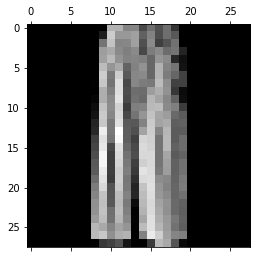

In [148]:
plt.matshow(test_outcomes[132, :].reshape(28, 28), cmap = "gray")